## Importing necessary libraries

In [204]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import random
import os

import warnings
warnings.simplefilter('ignore')

In [181]:
# importing libraries for deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

## Reading the datafiles

In [182]:
# specifying dataset directories
train_dir = "/kaggle/input/dogs-vs-cats/train/train"
test_dir = "/kaggle/input/dogs-vs-cats/test/test"

print('number of training images - ',len(os.listdir(train_dir)))
print('number of testing images - ',len(os.listdir(test_dir)))

number of training images -  25000
number of testing images -  12500


## Creating Training & Testing Data

In [183]:
IMG_SIZE = 60

CATEGORIES = ["cat", "dog"]

In [184]:
CATEGORIES.index("cat")

0

In [185]:
# creating training dataset
def create_training_data():
    training_data  = []
    images = []
    labels = []
    
    imagefiles = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]
    for image in imagefiles:
        category = image.split('/')[-1].split('.')[0]
        img_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data .append([new_array, CATEGORIES.index(category)])
        
    random.shuffle(training_data)
    for features,label in training_data:
        images.append(features)
        labels.append(label)
    images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    
    return images, labels

In [186]:
images, labels = create_training_data()

In [187]:
len(images)

25000

In [188]:
# creating testing data
def create_testing_data():
    test_images  = []
    
    imagefiles = [os.path.join(test_dir,f) for f in os.listdir(test_dir)]
    for image in imagefiles:
        img_array = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        test_images .append(new_array)
        
    random.shuffle(test_images)
#     test_images = np.array(test_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    return test_images


test_images = create_testing_data()
len(test_images)

12500

In [189]:
len(test_images[0])

60

In [190]:
# standardizing between 0 to 255
X_train = images / 255.0
X_test = np.array(test_images).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0

y_train = np.array(labels)

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Model Building

In [191]:
input_shape = (IMG_SIZE, IMG_SIZE, 1)

batch_size = 32
num_classes = 2
epochs = 100

In [192]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.15))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())

model.add(Dense(units=32, activation="relu"))
model.add(Dropout(rate=0.1))

model.add(Dense(units=num_classes, activation="softmax"))

## Compiling the model

In [193]:
# ? model.compile

In [194]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [195]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 58, 58, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 128)      

## Fitting the model

In [196]:
# ? model.fit

In [197]:
history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    steps_per_epoch = 1000,
                    epochs = epochs,
                    validation_split = 0.2,
                    validation_steps = 1000)

Epoch 1/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.6184 - accuracy: 0.6477 - val_loss: 0.5319 - val_accuracy: 0.7336
Epoch 2/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.5217 - accuracy: 0.7414 - val_loss: 0.4612 - val_accuracy: 0.7848
Epoch 3/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.4584 - accuracy: 0.7827 - val_loss: 0.4398 - val_accuracy: 0.7878
Epoch 4/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.4108 - accuracy: 0.8144 - val_loss: 0.3908 - val_accuracy: 0.8232
Epoch 5/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3740 - accuracy: 0.8300 - val_loss: 0.3663 - val_accuracy: 0.8390
Epoch 6/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3427 - accuracy: 0.8487 - val_loss: 0.3528 - val_accuracy: 0.8420
Epoch 7/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.3247 - accuracy: 0.8565 - val_loss: 0.3497 - val_ac

1000/1000 [==============================] - 5s 5ms/step - loss: 0.0876 - accuracy: 0.9661 - val_loss: 0.4267 - val_accuracy: 0.8724
Epoch 58/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0927 - accuracy: 0.9658 - val_loss: 0.4437 - val_accuracy: 0.8664
Epoch 59/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0862 - accuracy: 0.9669 - val_loss: 0.4104 - val_accuracy: 0.8748
Epoch 60/100
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0879 - accuracy: 0.9666 - val_loss: 0.4022 - val_accuracy: 0.8712
Epoch 61/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0861 - accuracy: 0.9681 - val_loss: 0.3746 - val_accuracy: 0.8672
Epoch 62/100
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0833 - accuracy: 0.9688 - val_loss: 0.4218 - val_accuracy: 0.8710
Epoch 63/100
 500/1000 [==============>...............] - 4s 7ms/step - loss: 0.0895 - accuracy: 0.9659 - val_loss: 0.4022 - val_accuracy

Let us plot the Training Accuracy vs Loss to get a better understanding of the model training.

Text(0.5, 1.0, 'Train - Accuracy')

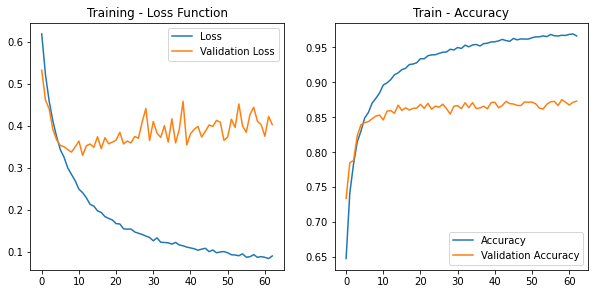

In [198]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

## Result

In [199]:
#Get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

In [200]:
predicted_classes[0]

1

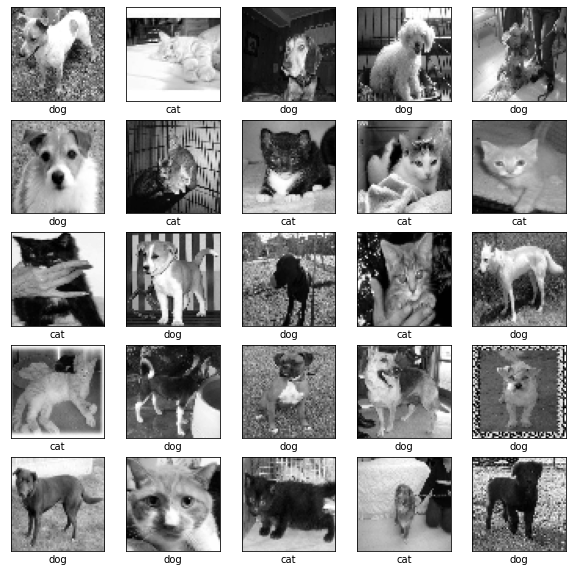

In [201]:
#Let's Visualize some predicted images 
plt.figure(figsize=(10,10))
rand = np.random.randint(0,1000*2,25)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[rand[i]], cmap="gray")
    plt.xlabel(CATEGORIES[predicted_classes[rand[i]]])

## Saving the model

In [202]:
model.save("cnn_classifier")

In [205]:
loaded_model = keras.models.load_model("cnn_classifier")

In [206]:
np.testing.assert_allclose(
    model.predict(X_test), loaded_model.predict(X_test)
)

In [207]:
loaded_predicted_classes = loaded_model.predict_classes(X_test)

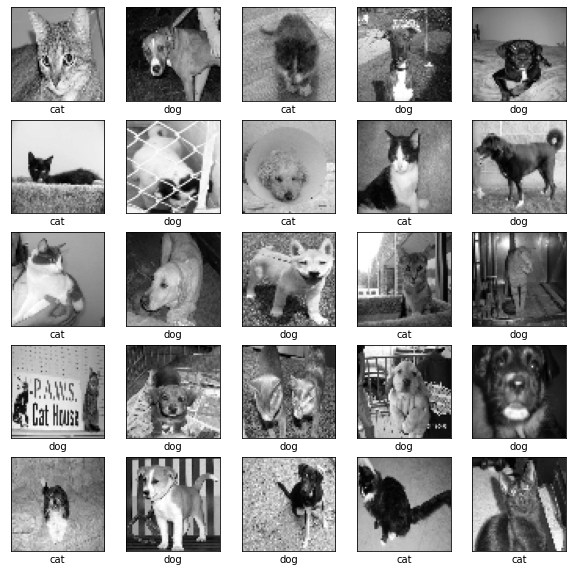

In [208]:
#Let's Visualize some predicted images 
plt.figure(figsize=(10,10))
rand = np.random.randint(0,1000*2,25)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[rand[i]], cmap="gray")
    plt.xlabel(CATEGORIES[loaded_predicted_classes[rand[i]]])